# Were any of the teams in Dr. Nyquist's class using loaded dice?
<img src="data/scoundrels_dicing.jpg" alt=""/>

In [58]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Read the data into a datatable
dice_rolls = Table().read_table("data/Dice_Data_2025_Fall.csv")
dice_rolls.show(3)

Team 1,Team 2,Team 3,Team 4
4,10,6,9
5,7,9,11
6,8,6,6


In [60]:
dice_rolls.labels

('Team 1', 'Team 2', 'Team 3', 'Team 4')

## Expected mean total is 7
**What we did the teams actually measure?**

In [61]:
for label in dice_rolls.labels:
    average = np.mean(dice_rolls.column(label))
    print(f"The {label} had an average roll of {average}")

The Team 1 had an average roll of 7.0
The Team 2 had an average roll of 8.8
The Team 3 had an average roll of 7.3
The Team 4 had an average roll of 7.32


**Let's look at the distribution of rolls. Anything suspicious?**

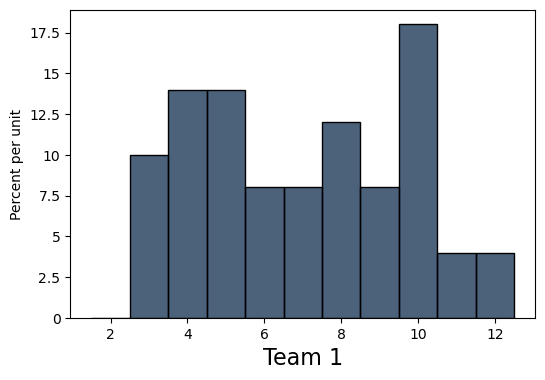

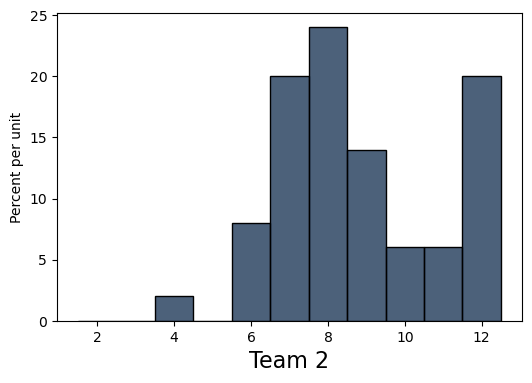

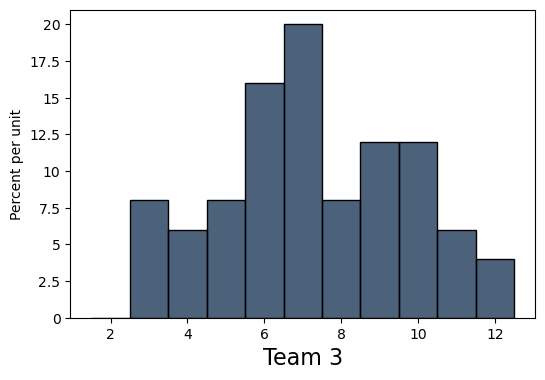

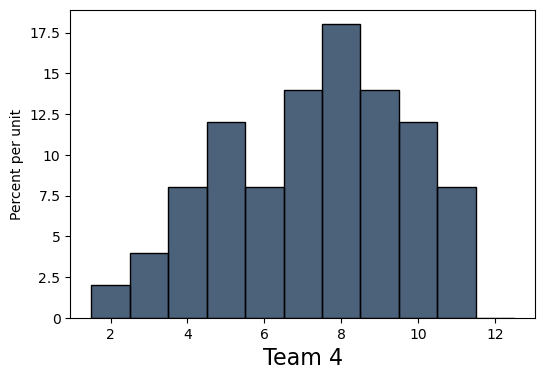

In [62]:
for label in dice_rolls.labels:
    dice_rolls.hist(label, bins=np.arange(1.5,13))

## Create a test statistic
The test statistics is the difference between the sample mean and the theortical mean.

In [63]:
expected_value = 7
test_statistic = np.mean(dice_rolls.column("Team 2")) - expected_value
test_statistic

1.8000000000000007

### Null Hypothesis
#### Teams did not cheat. They got a higher average purely by chance.

### Alternative Hypothesis
#### Teams 2 was unlikey to have done so well by chance.

## Simulating rolling dice 50 times
In a nutshell: we will simulate our experiment -- rolling a pair of dice 50 times -- over and over, each time recording the mean. In some simulations it will be greater than 7, in others less than 7. In the process, we will build up a distribution of possible outcomes of the experiment. We will then see how likely we are to get a sample mean as from the from the expected value as found by Team 2.

In [64]:
# Create an array to represent the possible outcomes of a single dice roll
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [65]:
# To simulate a roll, we make a random choice from this array.
np.random.choice(np.arange(1, 7))

4

In [66]:
# To simulate 50 rolls, we just pass 50 as the second parameter to np.random.choice
np.random.choice(np.arange(1, 7), 50)

array([6, 2, 4, 5, 1, 6, 6, 5, 3, 4, 5, 1, 5, 2, 3, 1, 4, 3, 6, 1, 4, 2, 2,
       5, 5, 1, 1, 5, 1, 3, 4, 1, 3, 4, 2, 6, 3, 4, 5, 2, 3, 4, 1, 5, 6, 6,
       2, 1, 6, 1])

In [67]:
# Now we will simulate rolling two dice and summing the result, fifty times.
sim_result = np.random.choice(np.arange(1, 7), 50) + np.random.choice(np.arange(1, 7), 50)
sim_result

array([ 5,  7,  3,  8,  5, 11,  8,  7,  5,  7, 11, 11,  5,  8, 10,  7,  5,
        2,  9,  9,  7,  5,  7,  9, 10,  2,  5,  6,  5, 12, 12, 12,  7,  6,
        4, 10,  3,  8,  8,  6, 10,  5,  9,  4,  7, 10,  5,  5,  7,  4])

The result above is one simulation of 50 rolls.

## Conduct our simulation of 50 rolls ten thousand times
To do this, we create an empty list hold our results. Then we loop 10,000 times. Each pass throught the loop we simulate 50 rolls and append the difference of the mean and the expected value to our list of results.

In [68]:
num_sim = 10_000
expected_value = 7
results = []
for i in np.arange(num_sim):
    sim_result = np.random.choice(np.arange(1, 7), 50) + np.random.choice(np.arange(1, 7), 50)
    sim_mean = np.average(sim_result)
    results.append(sim_mean - expected_value)

In [69]:
# Examine the first few results
results[0:10]

[0.099999999999999645,
 0.44000000000000039,
 0.62000000000000011,
 0.36000000000000032,
 0.33999999999999986,
 -0.45999999999999996,
 0.20000000000000018,
 -0.13999999999999968,
 0.29999999999999982,
 -0.059999999999999609]

## Plot the distribution of our the simulated differences from the expected value

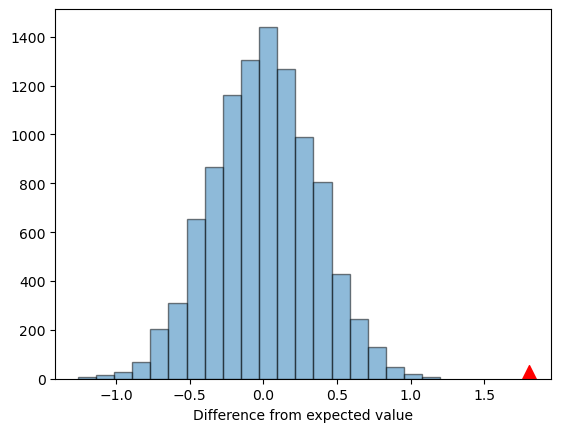

In [70]:
plt.hist(results, bins=20, alpha=0.5, edgecolor="black")
plt.scatter(test_statistic, 0, marker="^", s=400, color="red")
plt.xlabel("Difference from expected value");

You can see that most of the simulations yielded means within plus or minus 1 of the expected value. The value reported by Team 2 (red triangle) is out on the fringes.

## p-value
The p-value is the simply the probability of getting a result greater than or equal to the test statisic by chance. So we calculate what fraction of our simulations yielded differences from the expected value as large or larger as the value Team 2 reported.

In [71]:
results = np.array(results)
p_value = np.count_nonzero(results >= test_statistic) / num_sim
p_value

0.0

What did we just do to calculate the p-value?

## What does thie p-value mean?
In 10,000 simulations of rolling fair dice 50 times, we never got an average this far from the expected value of 7. We can say with great confidence that something is fishy about the dice used by Team 2.

Here is a quick explanation of how the count_nonzero worked.

In [45]:
x = make_array(1, 4, 8, 2, 5)
x > 4

array([False, False,  True, False,  True], dtype=bool)

In [46]:
# True is 1, False is 0, so...
np.count_nonzero(x > 4)

2

## What about Team 4?
Team 4 had a mean of 7.32, the next furtherest from the expected value of 7. Is this difference significant?

In [72]:
# New test statistic
test_statistic = 7.32 - 7.0
test_statistic

0.3200000000000003

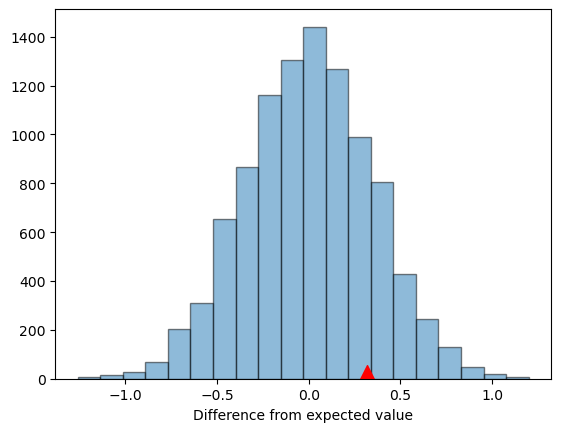

In [73]:
plt.hist(results, bins=20, alpha=0.5, edgecolor="black")
plt.scatter(test_statistic, 0, marker="^", s=400, color="red")
plt.xlabel("Difference from expected value");

This time the red triangle is well within the distribution of simulated values. Let's check the p-value.

In [74]:
p_value = np.count_nonzero(results > test_statistic) / num_sim
p_value

0.1683

There is a greater than 15% chance of getting a value as far from the expected value as Team 4's result. We don't have sufficient evidence to reject the Null Hypothesis, so we cannot say that Team 4's result shows evidence of foul play.

This doesn't *prove* that dice they used are fair, but the data are consistent with what we'd expect. Team 2, however, well they were clearly up to something shady.